In [72]:
%pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Enable inline plotting for Jupyter Notebooks
%matplotlib inline


# Read CSV file

In [74]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [75]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [76]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [77]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [78]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [80]:
df.shape

(4340, 8)

# check for NAN VAlues

In [81]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [82]:
df=df.dropna().reset_index(drop= True)

In [83]:
car_duplicate = df.duplicated().any()
car_duplicate


np.True_

In [84]:
df = df.drop_duplicates()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [85]:
car_duplicate = df.duplicated().any()
car_duplicate


np.False_

In [86]:
df.shape

(3577, 8)

In [87]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


# Using One Hot Encoding to clean Dataset

In [88]:
df['fuel']=df['fuel'].map({'Petrol':1, 'Diesel':2, 'CNG' : 3 , 'LPG' : 4 , 'Electric' : 5})

In [89]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,2,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,1,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,2,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,2,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,2,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,1,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,2,Individual,Manual,First Owner


In [90]:
df['transmission'] = df['transmission'].map({'Manual': 1, 'Automatic': 0})

In [91]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,Individual,1,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,Individual,1,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,2,Individual,1,First Owner
3,Datsun RediGO T Option,2017,250000,46000,1,Individual,1,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,2,Individual,1,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,2,Individual,1,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,2,Individual,1,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,1,Individual,1,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,2,Individual,1,First Owner


In [92]:
df['owner']=df['owner'].map({'First Owner':0, 'Second Owner': 1 , 'Third Owner' : 2 , 'Fourth & Above Owner' : 3 , 'Test Drive Car' : 4})

In [93]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,Individual,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,Individual,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,2,Individual,1,0
3,Datsun RediGO T Option,2017,250000,46000,1,Individual,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,2,Individual,1,1
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,2,Individual,1,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,2,Individual,1,1
4337,Maruti 800 AC BSIII,2009,110000,83000,1,Individual,1,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,2,Individual,1,0


In [94]:
df['seller_type']=df['seller_type'].map({'Individual':0,'Dealer': 1 , 'Trustmark Dealer' : 2})

In [95]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,2,0,1,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,2,0,1,1
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,2,0,1,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,2,0,1,1
4337,Maruti 800 AC BSIII,2009,110000,83000,1,0,1,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,2,0,1,0


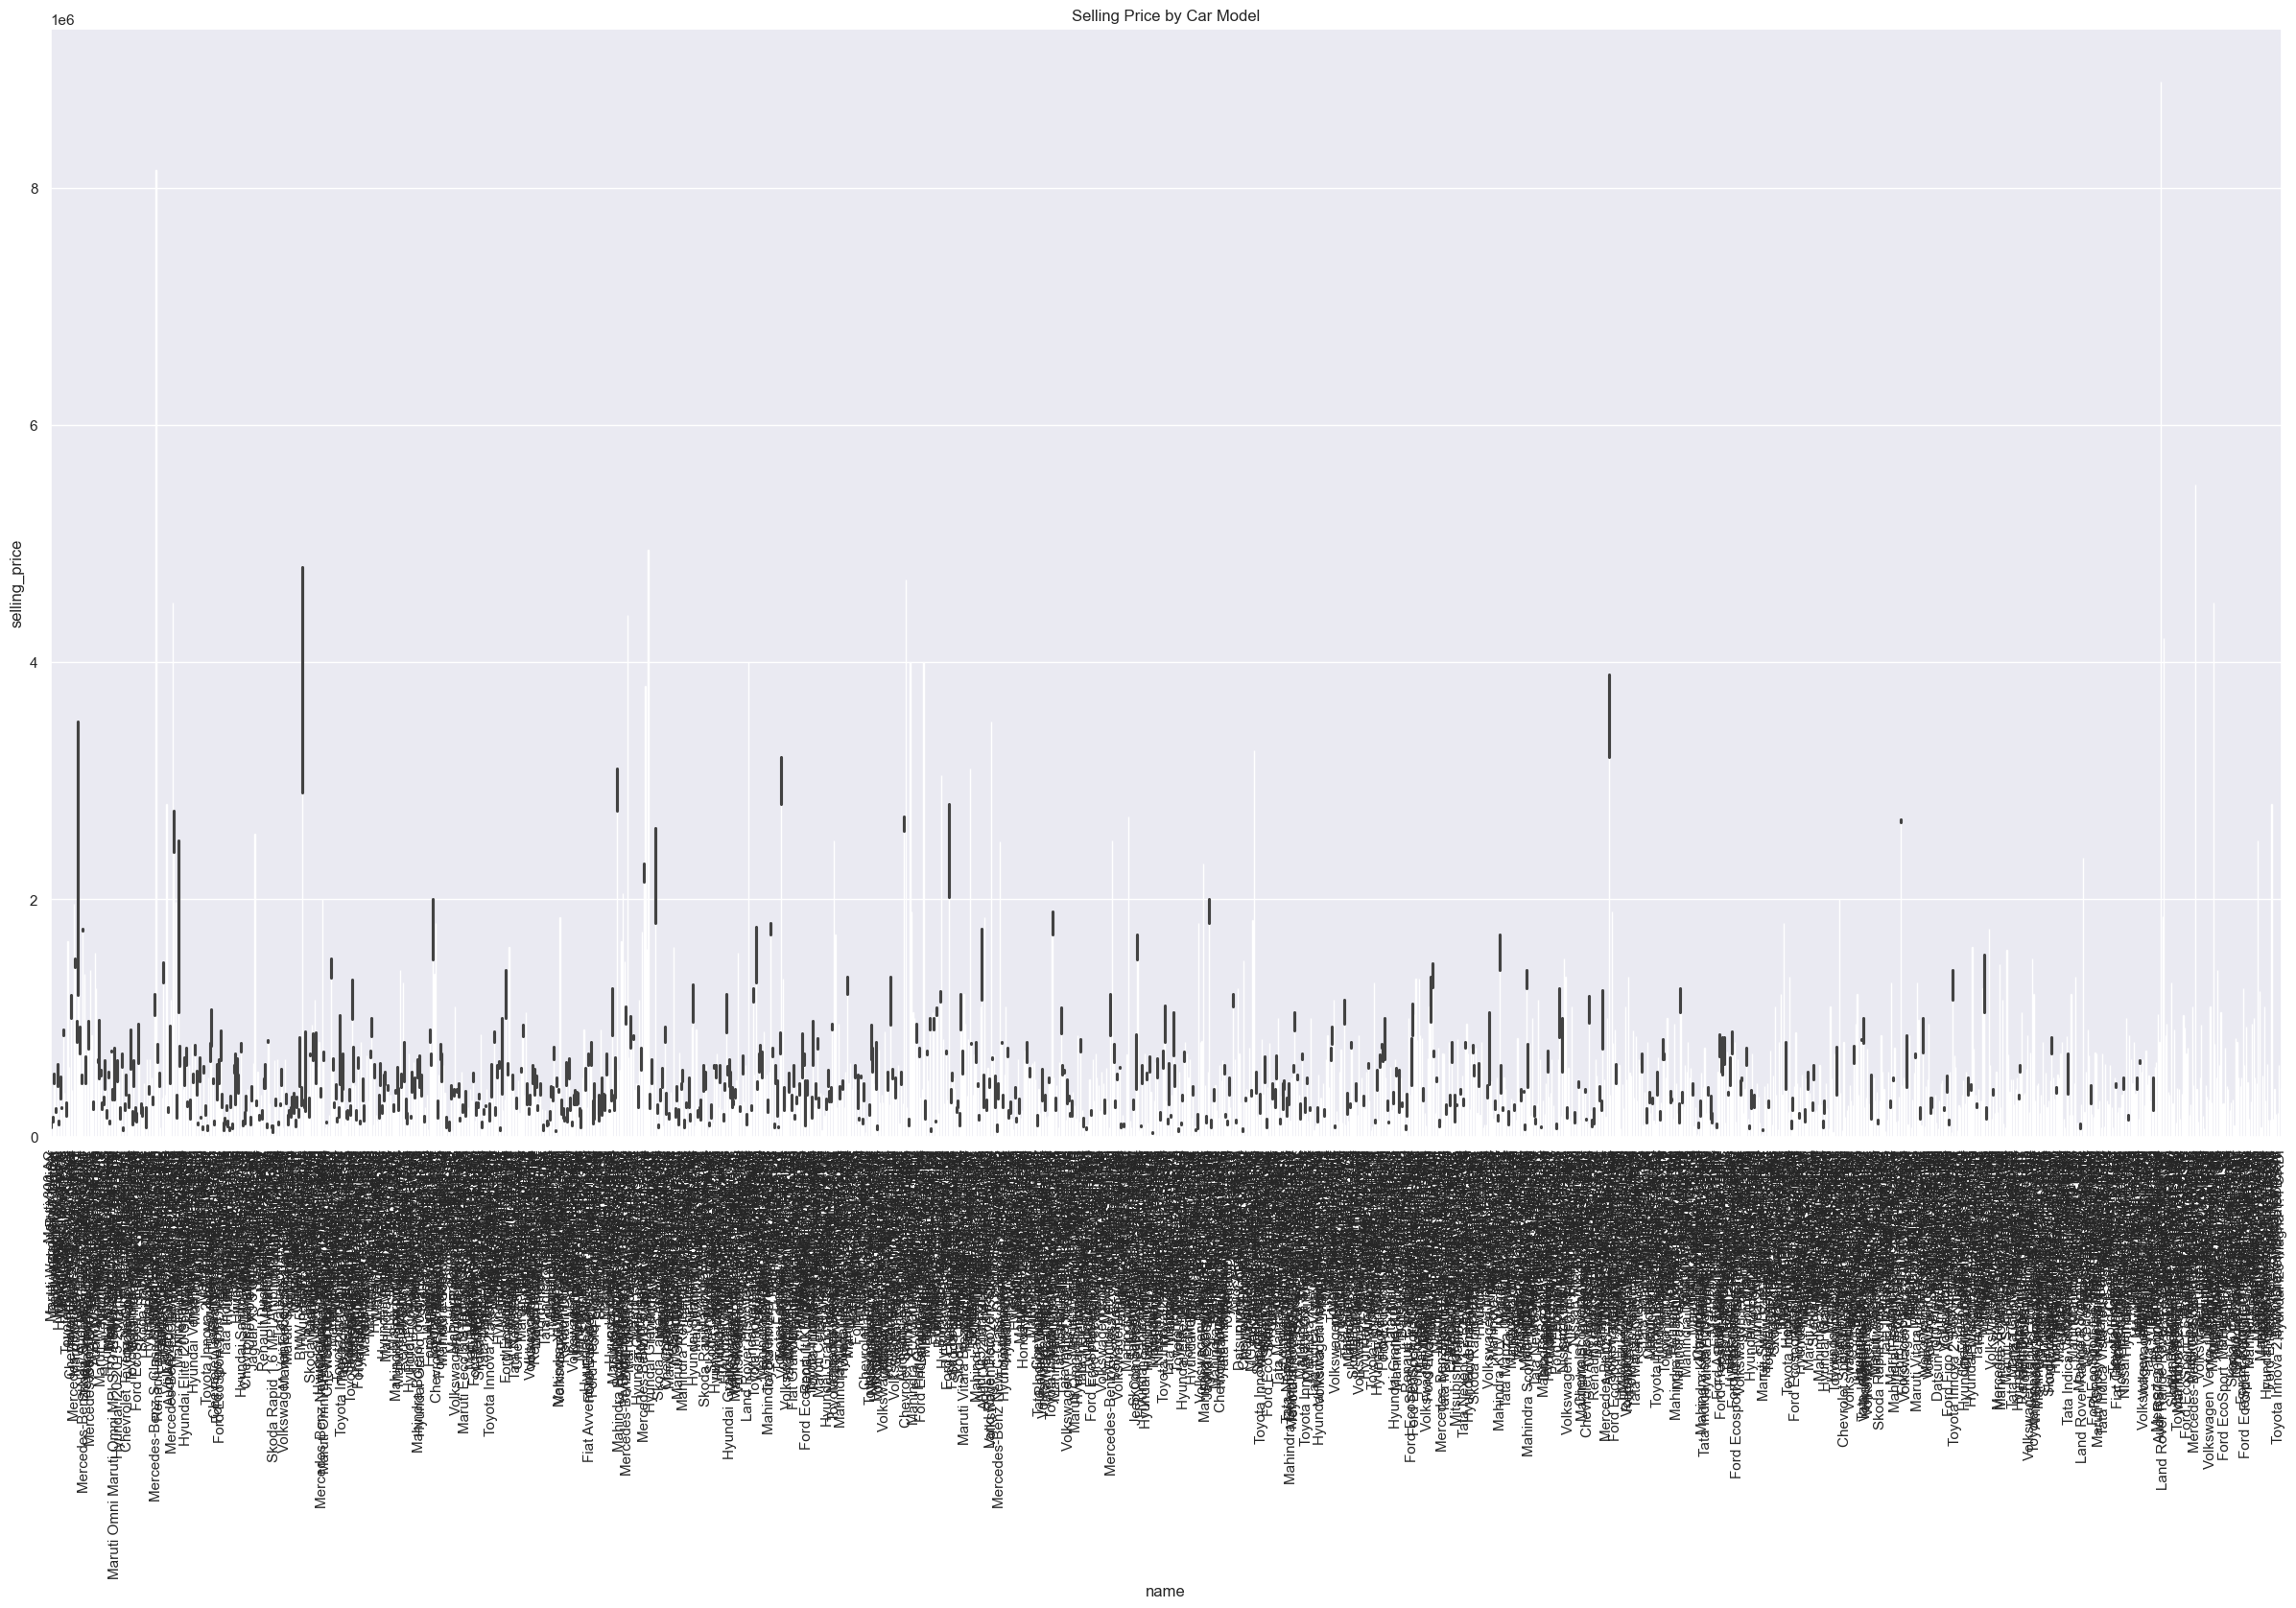

In [96]:
plt.figure(figsize=(30, 15))
sns.barplot(x='name', y='selling_price', data=df, width=0.1)
plt.xticks(rotation=90) 
plt.title("Selling Price by Car Model")
plt.show()


# not clear graph so use first 20 rows only

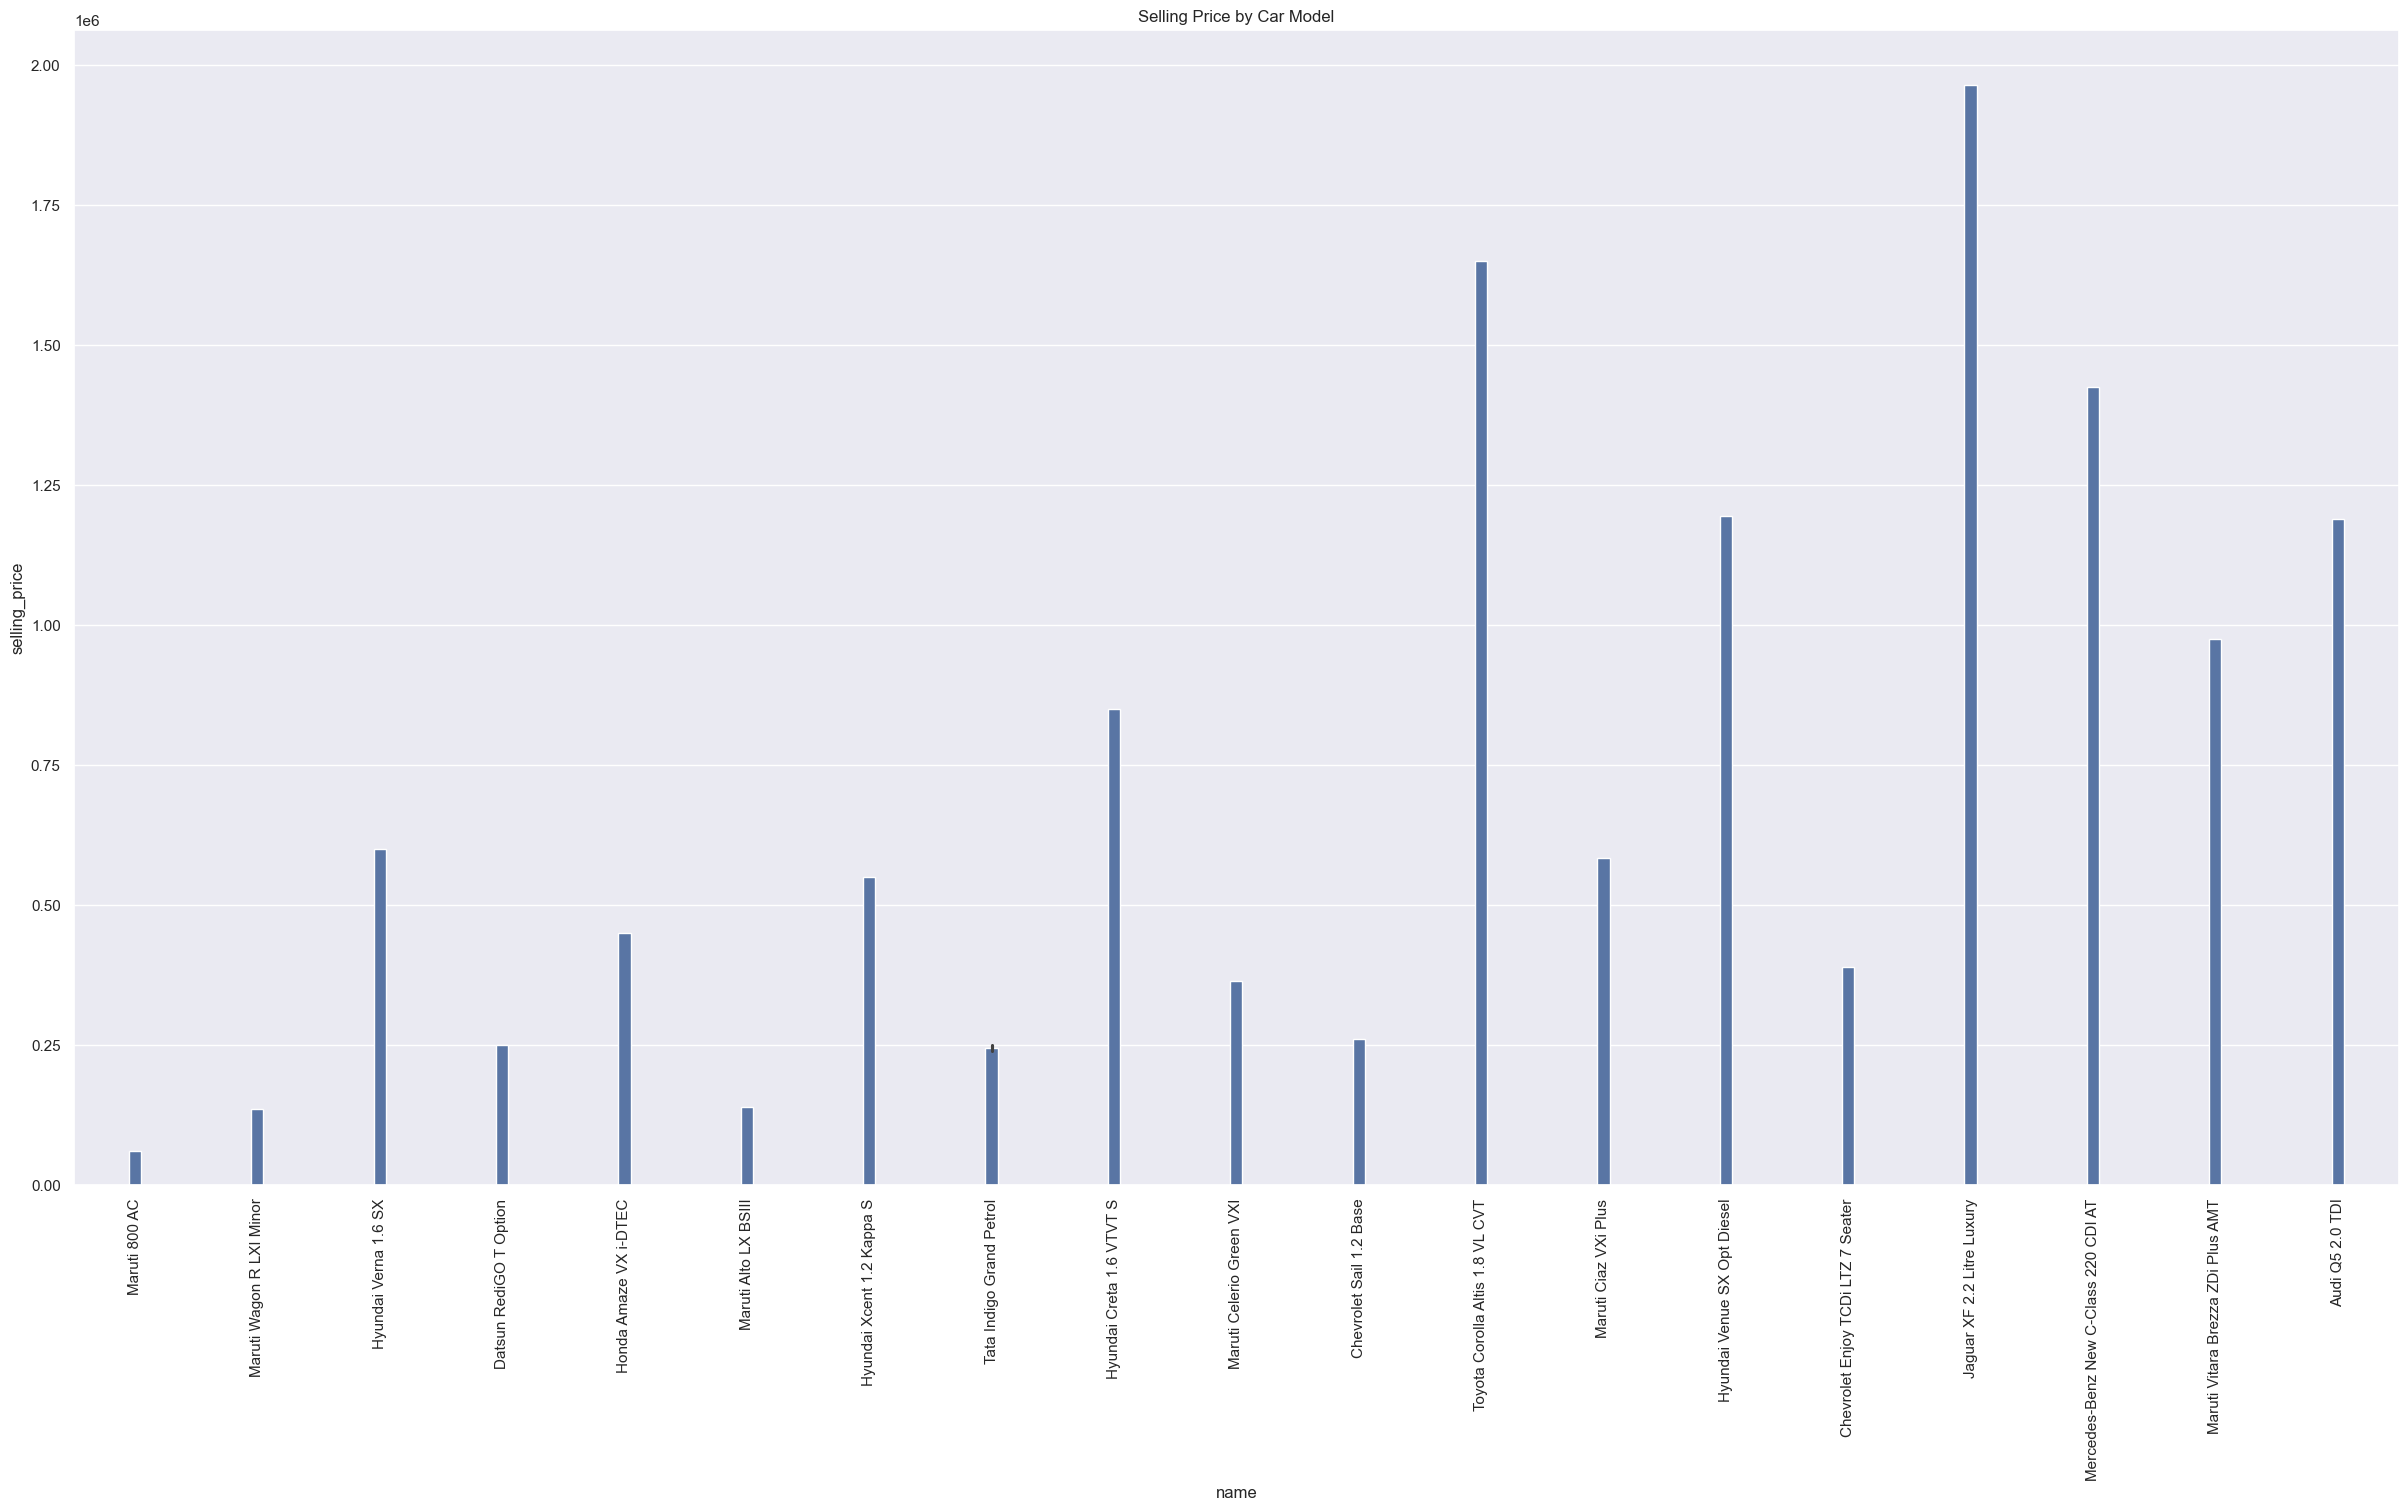

In [97]:
plt.figure(figsize=(30, 15))
sns.barplot(x='name', y='selling_price', data=df[:20], width=0.1)
plt.xticks(rotation=90) 
plt.title("Selling Price by Car Model")
plt.show()

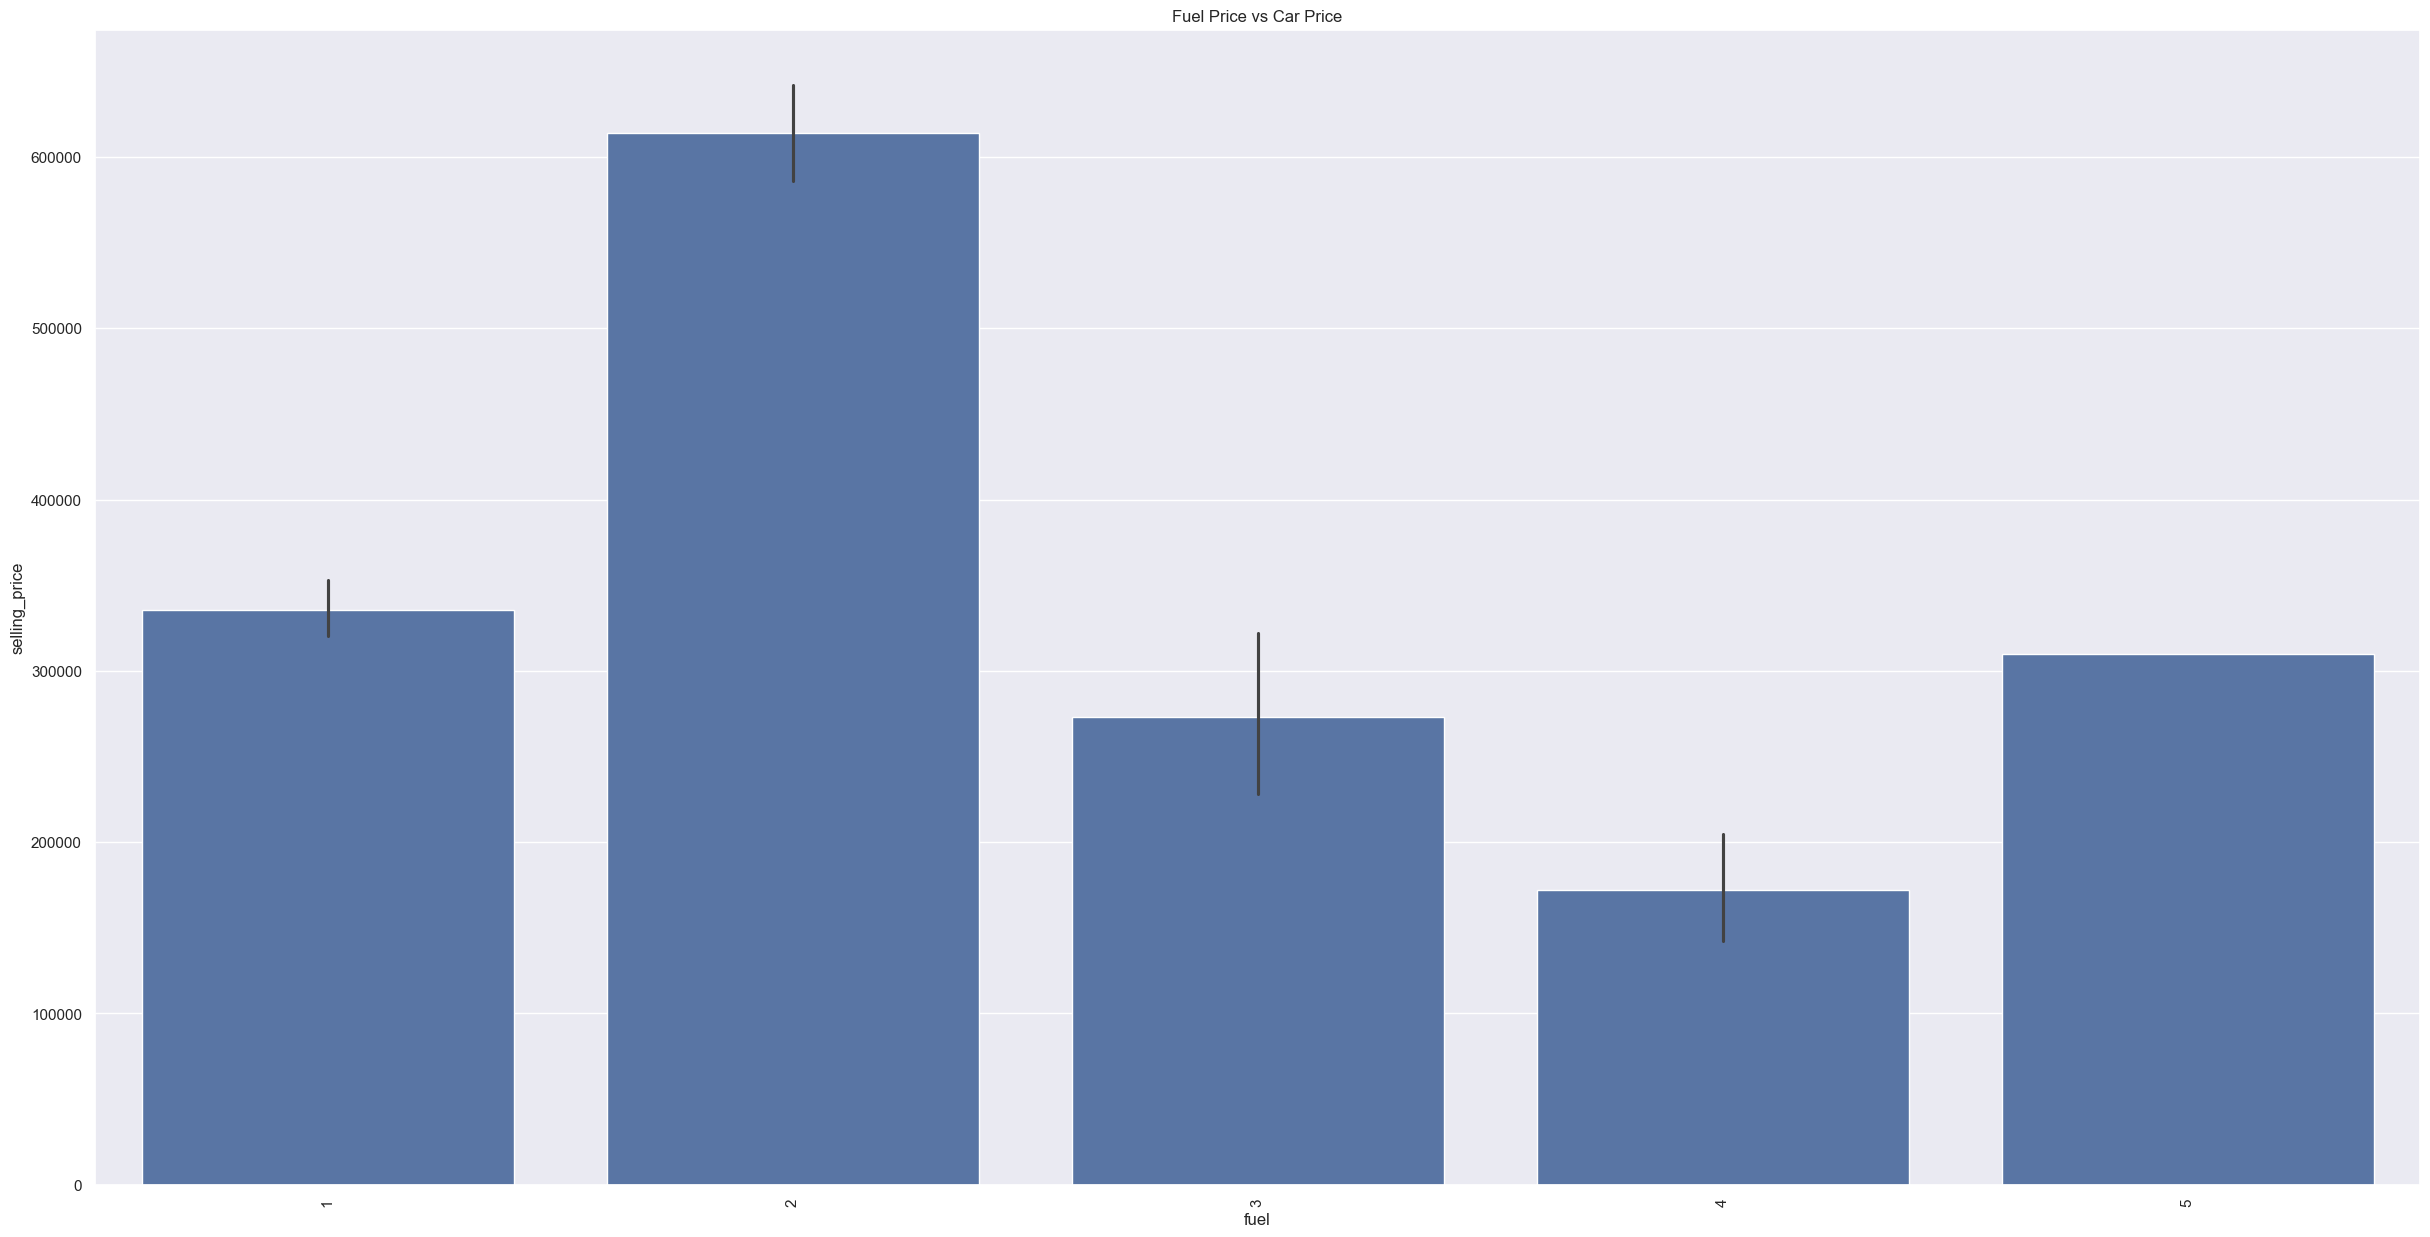

In [ ]:
plt.figure(figsize=(30, 15))
sns.barplot(x='fuel', y='selling_price',data = df)
 

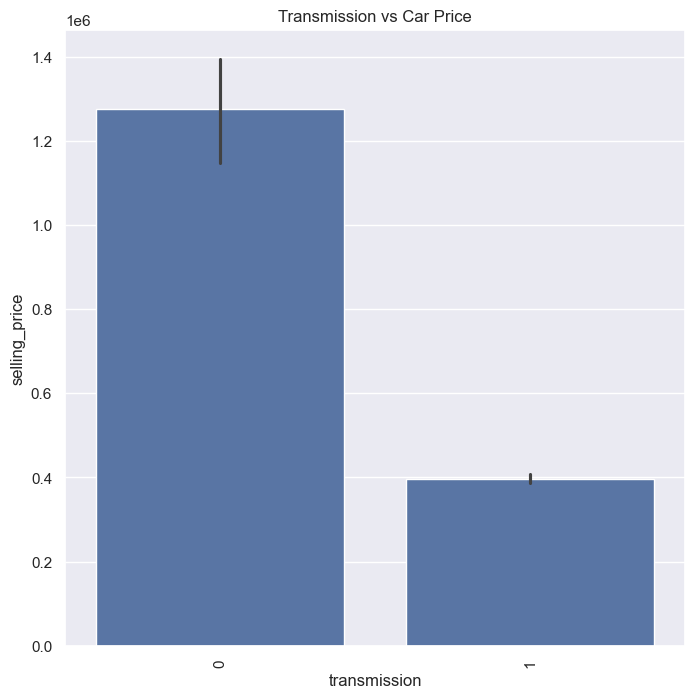

In [99]:
plt.figure(figsize=(8,8))
sns.barplot(x='transmission', y='selling_price',data = df, )
plt.xticks(rotation=90) 
plt.title("Transmission vs Car Price")
plt.show()

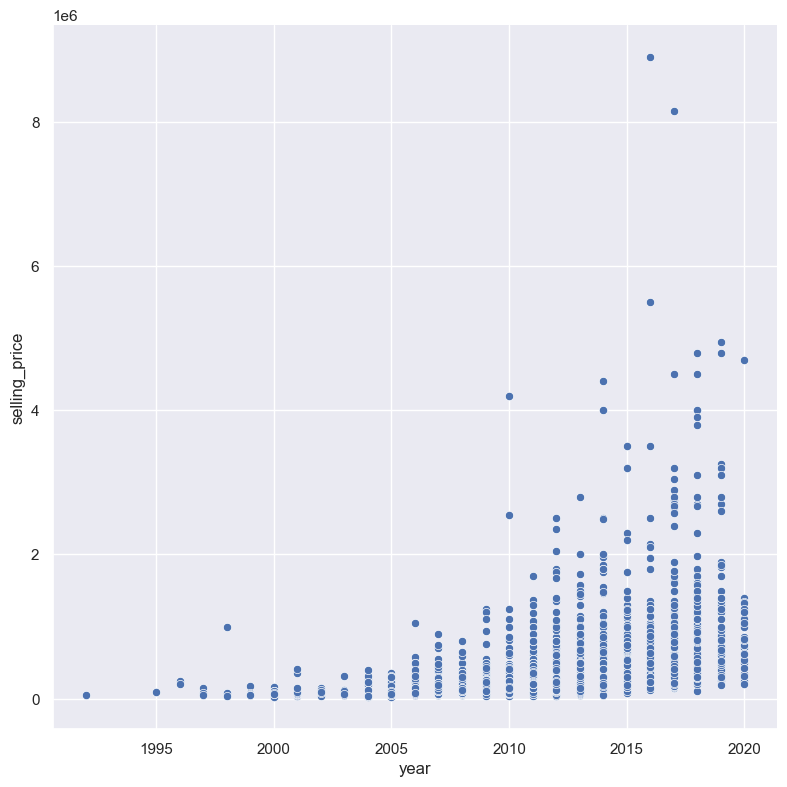

In [100]:
sns.set(style='darkgrid')
sns.pairplot(df, x_vars=['year'], y_vars='selling_price',height=8, aspect=1, kind='scatter')

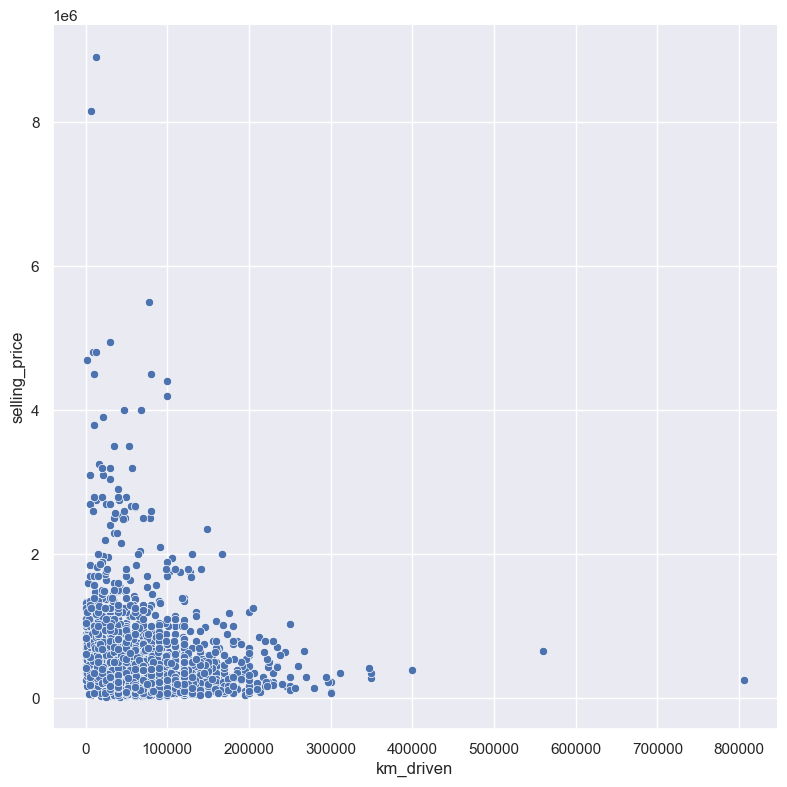

In [101]:
sns.pairplot(df, x_vars=['km_driven'], y_vars='selling_price',height=8, aspect=1, kind='scatter')


In [102]:
%pip install pandas_summary

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
# Summary for numeric columns (including one-hot encoded columns)
numeric_summary = df.describe(include='number')

# Summary for categorical columns (if needed)
categorical_summary = df.describe(include='object')

# Print summaries
print("Numeric Summary:")
print(numeric_summary)

print("\nCategorical Summary:")
print(categorical_summary)



Numeric Summary:
              year  selling_price      km_driven         fuel  seller_type  \
count  3577.000000   3.577000e+03    3577.000000  3577.000000  3577.000000   
mean   2012.962538   4.739125e+05   69250.545709     1.543472     0.217501   
std       4.251759   5.093018e+05   47579.940016     0.556005     0.434394   
min    1992.000000   2.000000e+04       1.000000     1.000000     0.000000   
25%    2010.000000   2.000000e+05   36000.000000     1.000000     0.000000   
50%    2013.000000   3.500000e+05   60000.000000     2.000000     0.000000   
75%    2016.000000   6.000000e+05   90000.000000     2.000000     0.000000   
max    2020.000000   8.900000e+06  806599.000000     5.000000     2.000000   

       transmission        owner  
count   3577.000000  3577.000000  
mean       0.912776     0.516914  
std        0.282202     0.770910  
min        0.000000     0.000000  
25%        1.000000     0.000000  
50%        1.000000     0.000000  
75%        1.000000     1.000000  


In [104]:
df.transmission.value_counts()

transmission
1    3265
0     312
Name: count, dtype: int64

In [105]:

df.seller_type.value_counts()

seller_type
0    2832
1     712
2      33
Name: count, dtype: int64

In [106]:
df['selling_price'] = df['selling_price'].apply(lambda x: np.log(x))

In [107]:

df = df.drop('name',axis = 1 )

# converted all the values into numeric so that we can easily sepearte values based on outliners using IQR Method

In [108]:

df.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000
mean,2012.962538,12.730341,69250.545709,1.543472,0.217501,0.912776,0.516914
std,4.251759,0.817210,47579.940016,0.556005,0.434394,0.282202,0.770910
min,1992.000000,9.903488,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2010.000000,12.206073,36000.000000,1.000000,0.000000,1.000000,0.000000
50%,2013.000000,12.765688,60000.000000,2.000000,0.000000,1.000000,0.000000
75%,2016.000000,13.304685,90000.000000,2.000000,0.000000,1.000000,1.000000
max,2020.000000,16.001562,806599.000000,5.000000,2.000000,1.000000,4.000000


In [109]:
Q1 = df.km_driven.quantile(0.25)
Q3 = df.km_driven.quantile(0.75)
Q1 , Q3

(np.float64(36000.0), np.float64(90000.0))

In [110]:
IQR = Q3 -Q1
IQR

np.float64(54000.0)

In [111]:

lower_limit = Q1-1.5*IQR
upper_limit = Q3 +1.5*IQR
lower_limit , upper_limit

(np.float64(-45000.0), np.float64(171000.0))

In [112]:
df[(df.km_driven,upper_limit)]

InvalidIndexError: (0        70000
1        50000
2       100000
3        46000
4       141000
         ...  
4335     80000
4336     80000
4337     83000
4338     90000
4339     40000
Name: km_driven, Length: 3577, dtype: int64, np.float64(171000.0))

In [ ]:
df = df[(df.km_driven>lower_limit)&(df.km_driven)


SyntaxError: incomplete input (2656413647.py, line 1)

In [ ]:
df.max(axis = 0)

year               2020.000000
selling_price        16.001562
km_driven        806599.000000
fuel                  5.000000
seller_type           2.000000
transmission          1.000000
owner                 4.000000
dtype: float64

In [ ]:
Q1 = df.selling_price.quantile(0.25)
Q3 = df.selling_price.quantile(0.75)
     

In [ ]:

IQR = Q3 -Q1
IQR

np.float64(1.0986122886681091)

In [ ]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3 +1.5*IQR
lower_limit , upper_limit
     

(np.float64(10.55815421252801), np.float64(14.952603367200446))

In [ ]:
df[(df.selling_price,upper_limit)]

InvalidIndexError: (0       11.002100
1       11.813030
2       13.304685
3       12.429216
4       13.017003
          ...    
4335    12.923910
4336    12.923910
4337    11.608236
4338    13.670485
4339    12.323856
Name: selling_price, Length: 3577, dtype: float64, np.float64(14.952603367200446))

In [ ]:
df = df[(df.selling_price>lower_limit)&(df.selling_price)

SyntaxError: incomplete input (1244800205.py, line 1)

# TRAING AND TESTING DATA BY SPLITTING THE DATA

In [ ]:
x = df.drop(['selling_price'], axis = 1)
y = df['selling_price']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 0)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
     

# POLYNOMIAL REGRESSION

In [ ]:

degree = 2
lin_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
lin_reg.fit(x_train_scaled, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
pred_train = lin_reg.predict(x_train_scaled)

In [ ]:
from sklearn import metrics


In [ ]:
error_score = metrics.r2_score(y_train, pred_train)
print("R squared Error :", error_score)

R squared Error : 0.6781776418617382


In [ ]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_train, pred_train)))
print('MSE: {}'.format(metrics.mean_squared_error(y_train, pred_train)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_train, pred_train))))

MAE: 0.3560142965038233
MSE: 0.21614798622630482
RMSE: 0.46491718211559446


Text(0, 0.5, 'ACTUAL PRICE VALUE')

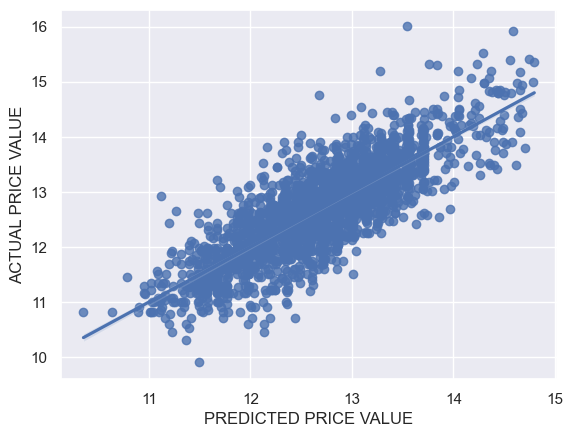

In [ ]:

sns.regplot(x=pred_train,y=y_train)
plt.xlabel("PREDICTED PRICE VALUE")
plt.ylabel("ACTUAL PRICE VALUE")

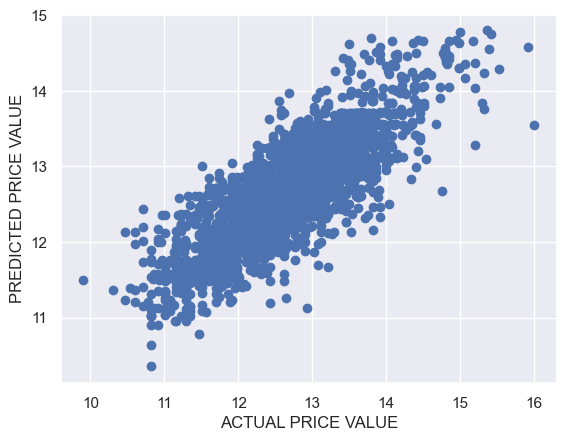

In [113]:

plt.scatter(y_train , pred_train)
plt.xlabel("ACTUAL PRICE VALUE")
plt.ylabel("PREDICTED PRICE VALUE")
plt.show()